#5) Classification of customers

In this section we try to classify customers to the above clusters using some features 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4'. Thus, we can use our models to classify a customer at the first purchase.


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/Customer Segmentation/Data/'
selected_customers = pd.read_csv(relative_path + 'data_selected_customers.csv')

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

We first build a class `Class_Fit` to manage classifier.

In [ ]:
class Class_Fit:
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))
        

##5.1) Prepare train and validation data 

In [ ]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [ ]:
Y_train.head()

1951    7
3255    0
4127    8
978     8
2414    8
Name: cluster, dtype: int64

In [ ]:
X_train.head()

,mean,categ_0,categ_1,categ_2,categ_3,categ_4
1951,1488.033333,0.534262,86.729688,12.736050,0.000000,0.000000
3255,243.840000,6.971785,24.606299,21.817585,20.767717,25.836614
4127,174.800000,64.759725,0.000000,26.887872,4.061785,4.290618
978,124.260000,43.457267,0.000000,32.641236,0.000000,23.901497
2414,218.566667,45.058716,2.333384,19.063596,4.209242,29.335062


## 5.2) SVM classifier

Here we build an SVM classifier. Use GridSearchCV with logariphmic scale from 0.01 to 100. For Cross-Validation use 5 folds.

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

svc = Class_Fit(clf = svm.LinearSVC, params={'max_iter':100})
svc.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
# to do - fix number of iterations

In [ ]:
from sklearn import metrics
svc.grid_fit(X = X_train, Y = Y_train)
#output is too big, try to supress it

In [ ]:
 svc.grid_predict(X_test, Y_test)

Precision: 59.24 % 


In [ ]:
# function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

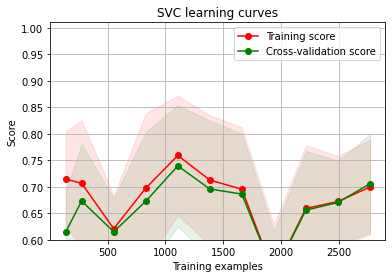

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# plot learning curves
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])



## 5.3) Logistic regression

**Task:** Similarly, build a logistic regression using `Class_Fit`, use grid search to train. Then compute the test precision and plot learning curves.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = Class_Fit(clf = LogisticRegression, params={'solver':'lbfgs', 'multi_class':'auto', 'max_iter':300})
lr.grid_search(parameters={'C':np.logspace(-2,2,10)}, Kfold=5)

In [ ]:
lr.grid_fit(X_train, Y_train)

In [ ]:
lr.grid.best_params_ 

{'C': 0.027825594022071243}

In [ ]:
lr.grid_predict(X_test, Y_test)

Precision: 89.49 % 


In [ ]:
lr.grid.best_estimator_

LogisticRegression(C=0.027825594022071243, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=300, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

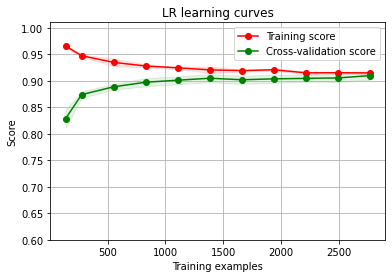

In [ ]:
g2 = plot_learning_curve(lr.grid.best_estimator_,
                        "LR learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                         cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                 0.6, 0.7, 0.8, 0.9, 1])

## 5.4) k-nearest neighbors

**Task:** Build a knn using `Class_Fit`, use grid search to train. Then compute the test precision and plot learning curves.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = Class_Fit(clf = KNeighborsClassifier, params=None)
knn.grid_search(parameters={'n_neighbors':np.concatenate((np.arange(1,10,1),
                                                          np.arange(10,40,5),
                                                          np.arange(40,80,10)))},
                Kfold=5)
knn.grid_fit(X_train, Y_train)

In [ ]:
knn.grid_predict(X_test, Y_test)

Precision: 82.56 % 


In [ ]:
knn.grid.best_params_

{'n_neighbors': 6}

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

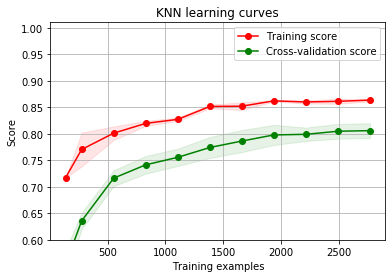

In [ ]:
plot_learning_curve(knn.grid.best_estimator_, 'KNN learning curves', X_train, Y_train, ylim=[0.6, 1.01],
                   train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.5) Decision tree

**Task:** Build a decision tree using `Class_Fit`, use grid search to train. Then compute the test precision and plot learning curves.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = Class_Fit(clf=DecisionTreeClassifier, params=None)
dt.grid_search(parameters={'min_samples_leaf':np.concatenate((np.arange(1,5,1),
                                                              np.arange(5,25,5),
                                                              np.arange(25,55,10),
                                                              np.arange(55,200,20)))},
               Kfold=5)
dt.grid_fit(X_train, Y_train)

In [ ]:
np.concatenate((np.arange(1,5,1),
                                                              np.arange(5,25,5),
                                                              np.arange(25,55,10),
                                                              np.arange(55,200,20)))

array([  1,   2,   3,   4,   5,  10,  15,  20,  25,  35,  45,  55,  75,
        95, 115, 135, 155, 175, 195])

In [ ]:
print(dt.grid.best_params_)
print(dt.grid_predict(X_test, Y_test))

{'min_samples_leaf': 15}
Precision: 89.49 % 
None


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

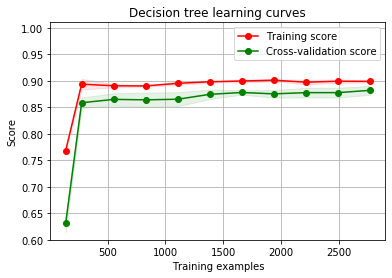

In [ ]:
plot_learning_curve(dt.grid.best_estimator_, 'Decision tree learning curves', X_train, Y_train, ylim=[0.6, 1.01],
                   train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.6) Random forest

**Task:** Build a random forest using `Class_Fit`, use grid search to train. Then compute the test precision and plot learning curves.

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rf = Class_Fit(clf=RandomForestClassifier, params=None)
rf.grid_search(parameters={'n_estimators':[100, 200],
                            'max_leaf_nodes':np.arange(5,20,2)},
                Kfold=5)
rf.grid_fit(X_train, Y_train)

rf.grid.best_params_, rf.grid_predict(X_test, Y_test)

Precision: 89.15 % 


({'max_leaf_nodes': 17, 'n_estimators': 200}, None)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

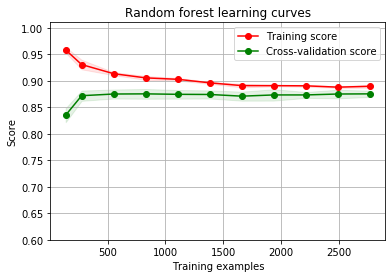

In [ ]:
plot_learning_curve(rf.grid.best_estimator_, 'Random forest learning curves', X_train, Y_train, ylim=[0.6, 1.01],
                   train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.7) Adaboost

### Boosting

Boosting technique was originally designed for classificaiton. The idea is to have a procedure that combines the outputs of many "weak" classifiers to produce a powerful "committee".

### AdaBoost (Adaptive boosting)

Let $X$ be a vector of predictors. The outcome is $Y \in \{-1,+1\}$. The classifier $G(X) \in \{-1,+1\}$

The (training) error rate is:
$$\overline{err} = \frac{1}{N} \sum_{i=1}^N I(y_i \neq G(x_i))$$

A weak classifier has its error rate slightly better than random guessing.

The purpose is to sequentially apply the weak classifier algorithm to repeatedly modified versions of thedata, thereby producing a sequence of weak classifiers $G_m(x), m=1,.. ,N$.

The final prediction is a weighted vote:
$$G(x) = sign(\sum_{m=1}^M \alpha_m G_m(x))$$
$\alpha_1,..,\alpha_m$ are computed by the boosting algorithm. They give more influence to the more accurate classifers.

Data modifications at each boosting step consists of applyting weights $w_1,..,w_N$ to each training observations $(x_i,y_i),i=1,..,N$. All weights are initially set to $\frac{1}{N}$. For each step, the weights of misclassified observations increase, so that new classifiers pay attention to guess them correctly.

---

Alorithm AdaBoost.M1 (discrete AdaBoost)

---
1. Init: $w_i=\frac{1}{N}, i=1,..,N$
2. For m=1,..,M:
  
  a. Fit a classifier $G_m(x)$ to the training data using weights $w_i$
  
  b. Compute 
  $$\overline{err} = \frac{\sum_{i=1}^N w_i I(y_i \neq G(x_i))}{\sum_{i=1}^N w_i}$$
  
  c. Compute
  $$\alpha_m = log(\frac{1-\overline{err}}{\overline{err}})$$
  
  d. Update $w_i = w_i \exp(\alpha_m I(y_i \neq G(x_i))), i=1,..,N$
  
3. Output $G(x) = sign(\sum_{m=1}^M \alpha_m G_m(x))$
  
---

We often use a tree as weak learner, for example a stump.

Five years later, it was discovered that AdaBoost can be seen as Forward Stagewise Additive Modeling with exponential loss $L(y, f(x))=\exp(-yf(x))$


___
Forwad Stgewise Additive Modeling
___
1. Init: $f_0(x) = 0$
2. For $m=1,..,M$:
  
  a. Compute: 
  $$(\beta_m, \gamma_m) = \arg\min_{\beta, \gamma} \sum_{i=1}^N L(y_i, f_{m-1}(x_i) + \beta b(x_i; \gamma))$$
  
  b. Update $$f_m(x) = f_{m-1}(x) + \beta_m b(x_i; \gamma_m))$$
___

Here, $b(x; \gamma)$ is a function with parameter set $\gamma$; $\beta_m$ is the expansion coefficient at step m. 

**Task:** Build an AdaBoost model using `Class_Fit`, use grid search to train. Then compute the test precision and plot learning curves.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = Class_Fit(clf=AdaBoostClassifier, params=None)

para_grid = {'base_estimator':[DecisionTreeClassifier(max_depth=1),
                               DecisionTreeClassifier(max_depth=5),
                               DecisionTreeClassifier(max_depth=7),
                               DecisionTreeClassifier(max_depth=9)
                              ],
             'algorithm':['SAMME','SAMME.R'],
             'n_estimators':[200] 
            }
ada.grid_search(parameters=para_grid, Kfold=5)

ada.grid_fit(X_train, Y_train)

ada.grid.best_params_, ada.grid_predict(X_test, Y_test)

Precision: 91.80 % 


({'algorithm': 'SAMME',
  'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=9, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'n_estimators': 200},
 None)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

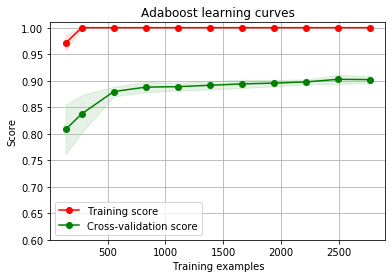

In [ ]:
plot_learning_curve(ada.grid.best_estimator_, 'Adaboost learning curves', X_train, Y_train, ylim=[0.6, 1.01],
                   train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.8) Gradient boosting classifier

In gradient boosting we use a differentiable loss function $L(y, f(x))$, not exponential loss like AdaBoost. We might say that Gradient boosting is more general.

For each step, to find the new base learner, Gradient Boosting uses functional gradient descent. 

A functional is a function of functions. It maps a function to a real number, e.g. maps a hypothesis function to the loss.

$$R[f]=\sum_{n=1}^N L(y_i, f(x_i))$$

Other examples:

$$R[f]=f(x)$$
$$R[f]=||f||$$
$$R[f]=||f||^2$$


The idea is that the functional gradient is a function, which corresponds to the stepest descent direct of the functional at the current function (similar to gradient). It's defined as follows:

$$R[f + \epsilon g] = R[f] + \epsilon <\nabla R[f], g> + O(\epsilon^2) \\
\lim_{\epsilon \rightarrow 0} \frac{R[f + \epsilon g] - R[f]}{\epsilon} = <\nabla R[f], g>$$

where $\nabla R[f]$ is the functional gradient at $f$.

Chain rule for functional gradients:

$$\nabla C(R[f]) = C' (R[f]) \nabla R[f]$$
where C is a function.

Examples:

$$\nabla (||f||^2)=2f$$
$$\nabla ((||f||^2)^3)=3||f||^4 2f = 6||f||^4 f$$

Note: the definition of functional gradient above depends on the choice of the inner product.

With N observations, we use a approximate inner product:
$$<f,g> = \frac{1}{N} \sum_{n=1}^N f(x_n) g(x_n)$$

When we have the functional gradient, we apply its opposite on $\{x_i\}$ to obtain pseudo-residuals:

$$r_{im}=-[ \frac{\partial L (y_i, f(x_i)) }{\partial f(x_i)}]_{f=f_{m-1}}$$

Examples of gradient descent (residuals):
1. $$L(y_i, f(x_i)) = \frac{1}{2} (y_i- f(x_i))^2\\
-\frac{\partial L (y_i, f(x_i)) }{\partial f(x_i)}=y_i - f(x_i)$$

2. $$L(y_i, f(x_i)) =  |y_i- f(x_i)|\\
-\frac{\partial L (y_i, f(x_i)) }{\partial f(x_i)}=sign(y_i - f(x_i))$$

---

Gradient Tree Boosting Algorithm (regresion, classification is similar)

---
1. Init: $f_0(x) = \arg\min_{\gamma} \sum_{i=1}^N L(y_i, \gamma)$
2. For $m=1,..,M$:
  
  a. For $i=1,..,N$, compute the pseudo-residuals:
  $$r_{im}=-[ \frac{\partial L (y_i, f(x_i)) }{\partial f(x_i)}]_{f=f_{m-1}}$$
  
  b. Fit a regression tree to the targets $r_{im}$ (i.e. data $\{x_i, r_{im}\}_{i=1}^N$) giving terminal regions $R_{jm}, j= 1,2,...,J_m$.
  
  c. For $j= 1,2,...,J_m$ compute:
  $$\gamma_{jm} = \arg\min_{\gamma} \sum_{x_i \in R_{jm}}^N L(y_i, f(x_i) + \gamma)$$
  
  d. Update $$f_m(x) = f_{m-1}(x) + \sum_{j=1}^{J_m} \gamma_{jm} I(x \in R_{jm})$$
  
3. Output $f_M(x)$
  
---


**Task:** Build a gradient boosting model using `Class_Fit`, use grid search to train. Then compute the test precision and plot learning curves.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gb = Class_Fit(clf=GradientBoostingClassifier, params=None)

para_grid = {
    'n_estimators':[100, 200, 300]
            }
gb.grid_search(parameters=para_grid, Kfold=5)

gb.grid_fit(X_train, Y_train)

gb.grid.best_params_, ada.grid_predict(X_test, Y_test)


Precision: 91.80 % 


({'n_estimators': 100}, None)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

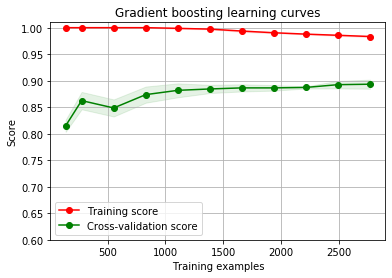

In [ ]:
plot_learning_curve(gb.grid.best_estimator_, 'Gradient boosting learning curves', X_train, Y_train, ylim=[0.6, 1.01],
                   train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.9) XGBoost 

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

https://xgboost.readthedocs.io/en/latest/

In [ ]:
from xgboost import XGBClassifier
xgb = Class_Fit(clf=XGBClassifier, params=None)

para_grid = {
    'objective':['multi:softmax'],
    'n_estimators':[100, 200, 300]
            }
xgb.grid_search(parameters=para_grid, Kfold=5)

xgb.grid_fit(X_train, Y_train)

xgb.grid.best_params_, xgb.grid_predict(X_test, Y_test)

Precision: 91.80 % 


({'n_estimators': 100, 'objective': 'multi:softmax'}, None)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

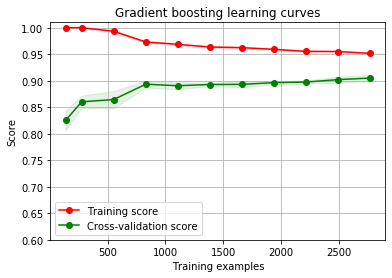

In [ ]:
plot_learning_curve(xgb.grid.best_estimator_, 'Gradient boosting learning curves', X_train, Y_train, ylim=[0.6, 1.01],
                   train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# 5.10) Testing predictions

**Task:** For each trained model above, compute the precision on the test set.

**Task:** For each trained model above, compute the precision on the test set.

In [ ]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logistic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (dt, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting'),
                (xgb, 'XGBoost')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X_test, Y_test)

______________________________ 
Support Vector Machine
Precision: 58.89 % 
______________________________ 
Logistic Regression
Precision: 91.34 % 
______________________________ 
k-Nearest Neighbors
Precision: 82.56 % 
______________________________ 
Decision Tree
Precision: 89.49 % 
______________________________ 
Random Forest
Precision: 89.15 % 
______________________________ 
Gradient Boosting
Precision: 90.88 % 
______________________________ 
XGBoost
Precision: 91.57 % 
